In [16]:
import numpy as np
import matplotlib.pyplot as plt

m = 5000;
n = 10;

# create the incremental vector
# this is same as the 2nd column of the Vandermonde matrix if n ≥ 2
step = 1 / (m - 1)
x = np.arange(0, m)[:,None]
x = x * step

# create vector to hold the condition numbers
cx = np.zeros(n)

# create the Vandermonde matrix with first column 
# and calculate its condition number
X = np.ones(m)[:,None]
print('Condition number of X when n (max poly power) =')
cx[0] = np.linalg.cond(X)
print(0, ":", cx[0])
# print(f'{X = }')

# add 2nd column if no of columns greater than 1
if n > 1:
    X = np.concatenate([X, x], axis=1)
    cx[1] = np.linalg.cond(X)
    print(1, ":", cx[1])
    # print(f'{X = }')
    
for j in range(2, n):
        
    # create the second column of the matrix
    #  augment to the matrix
    
    # do another n-2 times
    # create next column of the matrix
    # append it to the matrix 
    y = X[:, j - 1][:,None] * x
    X = np.concatenate([X, y], axis=1)
            
    # compute condition number of the matrix
    cx[j] = np.linalg.cond(X)
    print(j, ":", cx[j])
    # print(f'{X = }')


Condition number of X when n (max poly power) =
0 : 1.0
1 : 4.390214660564252
2 : 22.8835291914073
3 : 124.48259863287626
4 : 689.8370165324003
5 : 3862.935662510722
6 : 21777.661797380428
7 : 123354.28805532838
8 : 701161.3978394659
9 : 3996295.206731794


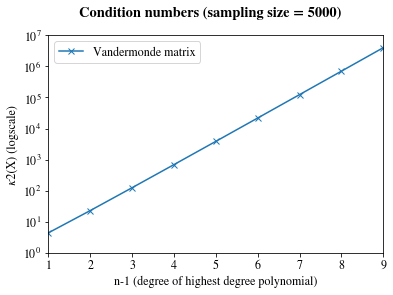

In [21]:
import math

# list all fonts available tomatplotlib
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# but easier from the Fonts app of macOS

# default font in matplotlib is given by
# matplotlib.rcParams['font.family']

# To use a font everywhere
# matplotlib.rcParams['font.sans-serif'] = ['STIXGeneral', 'PingFang TC']

# shorthand for fonts
# hfont = {'fontname':'STIXGeneral'}
# plt.ylabel('𝜅₂(X) (logscale)', **hfont)

fig, ax = plt.subplots()
n = cx.shape
x_lab = range(0,n[0])
ax.plot(x_lab, cx, marker='x', label = "Vandermonde matrix")
ax.legend(loc = "upper left", **{'fontsize':'large'})
plt.yscale("log")
yl = math.ceil(math.log10(max(cx)))
plt.axis( (1, n[0] - 1, 1, 10**yl) )
plt.minorticks_off()
ax.tick_params(labelsize = 'large')
fig.suptitle("Condition numbers (sampling size = %s)" %(str(m)), **{'fontsize':'x-large'}, **{'fontweight':'bold'})
plt.xlabel('n-1 (degree of highest degree polynomial)', **{'fontsize':'large'})
plt.ylabel('𝜅2(X) (logscale)', **{'fontname':'STIXGeneral'}, **{'fontsize':'large'})
plt.show()


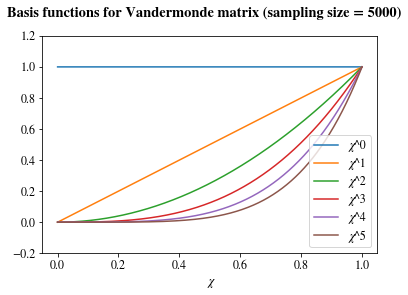

In [19]:
# had to insert these two lines because legend() 
# is not accepting **{'fontname':'STIXGeneral'} as an argument
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['STIXGeneral']

fig, ax = plt.subplots()
n = x.shape
labels = ['𝜒^0', '𝜒^1', '𝜒^2', '𝜒^3', '𝜒^4', '𝜒^5']
for i in range(6):
    ax.plot(x, X[:, i], label = labels[i])
x1,x2,y1,y2 = plt.axis()
plt.axis((x1, x2, -0.2, 1.2))
ax.legend(loc = "lower right", **{'fontsize':'large'})
fig.suptitle("Basis functions for Vandermonde matrix (sampling size = %s)" %(str(m)), **{'fontsize':'x-large'}, **{'fontweight':'bold'})
ax.tick_params(labelsize = 'large')
plt.xlabel('𝜒', **{'fontsize':'large'})
plt.show()